# Libraries import

In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline    
from matplotlib import rcParams

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics, linear_model

## Data upload and DataFrames creation

In [6]:
# Main dataframe - 'flights' with flights details
# I will work on 50000 records, because dataset is much bigger
nRowsRead = 50000 
flights = pd.read_csv('/content/flights.csv', delimiter=',', nrows = nRowsRead)
flights.dataframeName = 'flights.csv'
nRow, nCol = flights.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 50000 rows and 31 columns


In [7]:
airlines = pd.read_csv('/content/airlines.csv') # Airlines names with IATA codes
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [8]:
airports = pd.read_csv('/content/airports.csv') # Airports names with details
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [9]:
flights.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


##Dummy

In [11]:
dummy_fields = ['AIRLINE']  # creating additional columns for each of airline with dummy method
for each in dummy_fields:
    dummies = pd.get_dummies(flights[each], prefix=each, drop_first=False)
    flights=pd.concat([flights, dummies], axis=1)
flights.head(10)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,0,0,0,0,0,0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,0,0,0,0,0,0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,0,0,0,0,0,1,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,0,0,0,0,0,0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,0,0,0,0,0,0,0,0
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,0,0,0,0,0,0,0,0,0,0
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,0,0,0,0,1,0,0,0,0,0
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,0,0,0,0,0,0,0,1,0,0
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,0,0,0,0,0,0,0,0,0,0
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,0,0,0,0,0,0,0,0,0,0


# Data analyzing

In [12]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 50000 non-null  int64  
 1   MONTH                50000 non-null  int64  
 2   DAY                  50000 non-null  int64  
 3   DAY_OF_WEEK          50000 non-null  int64  
 4   AIRLINE              50000 non-null  object 
 5   FLIGHT_NUMBER        50000 non-null  int64  
 6   TAIL_NUMBER          49941 non-null  object 
 7   ORIGIN_AIRPORT       50000 non-null  object 
 8   DESTINATION_AIRPORT  50000 non-null  object 
 9   SCHEDULED_DEPARTURE  50000 non-null  int64  
 10  DEPARTURE_TIME       48896 non-null  float64
 11  DEPARTURE_DELAY      48896 non-null  float64
 12  TAXI_OUT             48873 non-null  float64
 13  WHEELS_OFF           48873 non-null  float64
 14  SCHEDULED_TIME       50000 non-null  int64  
 15  ELAPSED_TIME         48753 non-null 

In [14]:
flights['CANCELLATION_REASON'].unique() # review of appearing cancellation reasons

array([nan, 'A', 'B', 'C'], dtype=object)

In [15]:
flights=flights[flights['CANCELLATION_REASON'].isna()]

In [16]:
flights['CANCELLATION_REASON'].unique()

array([nan], dtype=object)

In [17]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,0,0,0,0,0,0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,0,0,0,0,0,0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,0,0,0,0,0,1,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,0,0,0,0,0,0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,0,0,0,0,0,0,0,0


In [18]:
flights.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER                0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME             0
DEPARTURE_DELAY            0
TAXI_OUT                   0
WHEELS_OFF                 0
SCHEDULED_TIME             0
ELAPSED_TIME             109
AIR_TIME                 109
DISTANCE                   0
WHEELS_ON                 23
TAXI_IN                   23
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME              23
ARRIVAL_DELAY            109
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    48862
AIR_SYSTEM_DELAY       33454
SECURITY_DELAY         33454
AIRLINE_DELAY          33454
LATE_AIRCRAFT_DELAY    33454
WEATHER_DELAY          33454
AIRLINE_AA                 0
AIRLINE_AS                 0
AIRLINE_B6                 0
AIRLINE_DL    

In [19]:
flights.fillna(0, inplace=True)

In [20]:
flights.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
AIRLINE_AA             0
AIRLINE_AS             0
AIRLINE_B6             0
AIRLINE_DL             0
AIRLINE_EV             0
AIRLINE_F9             0
AIRLINE_HA             0
AIRLINE_MQ             0
AIRLINE_NK             0


# _DELAY columns analyzing

In [21]:
flights[['DEPARTURE_DELAY',"ARRIVAL_DELAY", 'AIR_SYSTEM_DELAY', 'LATE_AIRCRAFT_DELAY','SECURITY_DELAY','WEATHER_DELAY']][0:50]

,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,LATE_AIRCRAFT_DELAY,SECURITY_DELAY,WEATHER_DELAY
0,-11.0,-22.0,0.0,0.0,0.0,0.0
1,-8.0,-9.0,0.0,0.0,0.0,0.0
2,-2.0,5.0,0.0,0.0,0.0,0.0
3,-5.0,-9.0,0.0,0.0,0.0,0.0
4,-1.0,-21.0,0.0,0.0,0.0,0.0
5,-5.0,8.0,0.0,0.0,0.0,0.0
6,-6.0,-17.0,0.0,0.0,0.0,0.0
7,14.0,-10.0,0.0,0.0,0.0,0.0
8,-11.0,-13.0,0.0,0.0,0.0,0.0
9,3.0,-15.0,0.0,0.0,0.0,0.0


In [22]:
flights['ARRIVAL_DELAY'].describe()

count    48862.000000
mean        13.566248
std         43.331341
min        -54.000000
25%         -9.000000
50%          2.000000
75%         22.000000
max       1384.000000
Name: ARRIVAL_DELAY, dtype: float64

# Presenting of 'ARRIVAL_DELAY' statistics

In [24]:
max_delay = flights['ARRIVAL_DELAY'].max()
min_delay = flights['ARRIVAL_DELAY'].min()
med = flights['ARRIVAL_DELAY'].median()
mean = flights['ARRIVAL_DELAY'].mean()
mode = flights['ARRIVAL_DELAY'].mode()
std = flights['ARRIVAL_DELAY'].std()
var = flights['ARRIVAL_DELAY'].var()
no_delay = flights.loc[(flights['ARRIVAL_DELAY'] != 0)].count()
print(f'Max delay: {max_delay}, Min delay: {min_delay}, Mediana: {med},  Delays Average {mean}, Standard deviation {std}, Variance {var}')

Max delay: 1384.0, Min delay: -54.0, Mediana: 2.0,  Delays Average 13.566247799926323, Standard deviation 43.33134091415675, Variance 1877.6051054188747


# Heat map

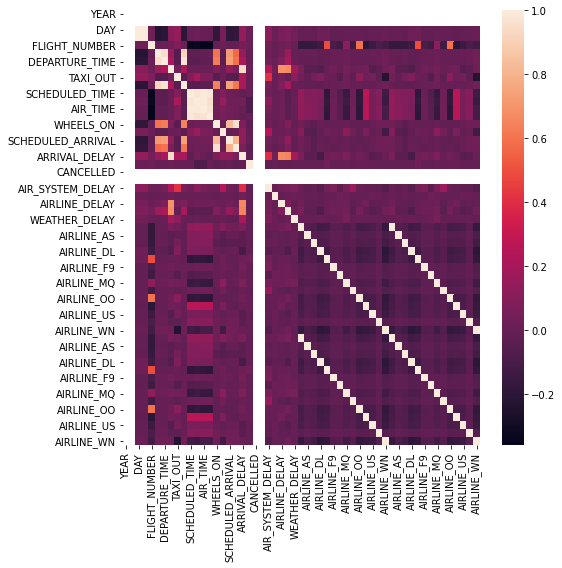

In [25]:
rcParams["figure.figsize"]=[8,8]
sns.heatmap(flights.corr())

In [26]:
# flights.drop(['YEAR','FLIGHT_NUMBER','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','ARRIVAL_TIME','CANCELLATION_REASON'],axis=1,inplace=True)

# Setting up 10min point of delay

In [27]:
#1 spóźnienia mniejsze niż 10 minut nie są brane pod uwagę
flights['RESULT']=flights['ARRIVAL_DELAY'].apply(lambda x: 1 if x>10 else 0)
flights['RESULT'].value_counts()



0    31112
1    17750
Name: RESULT, dtype: int64

In [28]:
flights[['DEPARTURE_DELAY',"ARRIVAL_DELAY", 'AIR_SYSTEM_DELAY', 'LATE_AIRCRAFT_DELAY','SECURITY_DELAY','WEATHER_DELAY']][0:50]

,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,LATE_AIRCRAFT_DELAY,SECURITY_DELAY,WEATHER_DELAY
0,-11.0,-22.0,0.0,0.0,0.0,0.0
1,-8.0,-9.0,0.0,0.0,0.0,0.0
2,-2.0,5.0,0.0,0.0,0.0,0.0
3,-5.0,-9.0,0.0,0.0,0.0,0.0
4,-1.0,-21.0,0.0,0.0,0.0,0.0
5,-5.0,8.0,0.0,0.0,0.0,0.0
6,-6.0,-17.0,0.0,0.0,0.0,0.0
7,14.0,-10.0,0.0,0.0,0.0,0.0
8,-11.0,-13.0,0.0,0.0,0.0,0.0
9,3.0,-15.0,0.0,0.0,0.0,0.0


#Visualisations

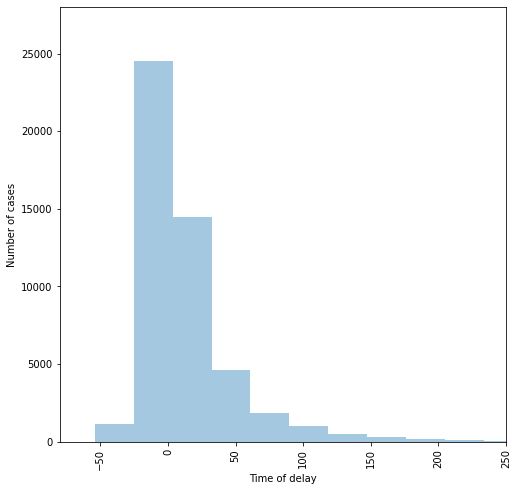

In [68]:
ax = sns.distplot(flights['ARRIVAL_DELAY'], kde=False, hist=True)
ax.set_xlim(-80, 250)
ax.set_ylim(0, 28000,1000)
ax.set_xlabel("Time of delay")
ax.set_ylabel("Number of cases")
ax.xaxis.set_tick_params(rotation=90)

plt.plot()
plt.show()

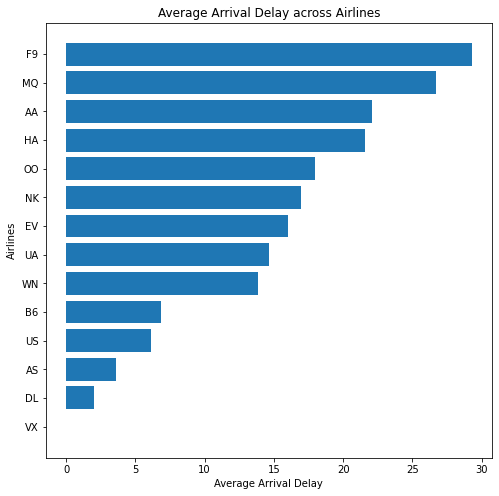

In [69]:
arr_data = flights.groupby('AIRLINE').mean()['ARRIVAL_DELAY'].sort_values()

plt.barh(y = arr_data.index, width = arr_data.values)
plt.xlabel("Average Arrival Delay")
plt.ylabel("Airlines")
plt.title("Average Arrival Delay across Airlines")
plt.show()

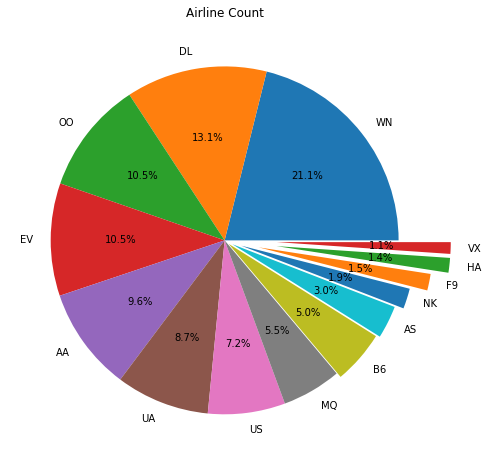

In [70]:
airlines_labels = list(flights['AIRLINE'].value_counts().index)
plt.figure(figsize=(15,8))
plt.pie(flights['AIRLINE'].value_counts(), autopct = '%1.1f%%', labels = airlines_labels, explode = (0,0,0,0,0,0,0,0,0.03,0.05,0.1,0.2,0.3,0.3))
plt.title("Airline Count")
plt.show()

#Predictions

Linear Regression, Decision Tree Classifier, Random Forest Classifier

In [71]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48862 entries, 0 to 49999
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 48862 non-null  int64  
 1   MONTH                48862 non-null  int64  
 2   DAY                  48862 non-null  int64  
 3   DAY_OF_WEEK          48862 non-null  int64  
 4   AIRLINE              48862 non-null  object 
 5   FLIGHT_NUMBER        48862 non-null  int64  
 6   TAIL_NUMBER          48862 non-null  object 
 7   ORIGIN_AIRPORT       48862 non-null  object 
 8   DESTINATION_AIRPORT  48862 non-null  object 
 9   SCHEDULED_DEPARTURE  48862 non-null  int64  
 10  DEPARTURE_TIME       48862 non-null  float64
 11  DEPARTURE_DELAY      48862 non-null  float64
 12  TAXI_OUT             48862 non-null  float64
 13  WHEELS_OFF           48862 non-null  float64
 14  SCHEDULED_TIME       48862 non-null  int64  
 15  ELAPSED_TIME         48862 non-null 

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [73]:
# from pandas.core.common import random_state
# from sklearn.linear_model import LogisticRegression
# X = flights['WHEELS_ON'].to_numpy().reshape(-1,1)
# y = flights['CANCELLED'].to_numpy().reshape(-1,1)
# clf = LogisticRegression(random_state=0).fit(X, y.ravel())
# clf.score(X,y)

In [74]:
# haszujemy dropa po pierwszym puszczeniu bo potem nie będzie co dropować
# X = flights.drop(['DIVERTED', 'CANCELLED', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT','DESTINATION_AIRPORT', 'AIRLINE', 'TAIL_NUMBER','ARRIVAL_DELAY','AIR_SYSTEM_DELAY',	'SECURITY_DELAY',	'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',	'WEATHER_DELAY','AIR_TIME', 'YEAR'],axis=1)
X_NEW = X.iloc[:,:-1]
y = flights.RESULT


In [75]:
X_NEW.columns
#usunąć elapsed_time, arrival_time - reszta może zostać

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'CANCELLATION_REASON', 'AIRLINE_AA', 'AIRLINE_AS',
       'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9', 'AIRLINE_HA',
       'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA', 'AIRLINE_US',
       'AIRLINE_VX', 'AIRLINE_WN', 'AIRLINE_AA', 'AIRLINE_AS', 'AIRLINE_B6',
       'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9', 'AIRLINE_HA', 'AIRLINE_MQ',
       'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA', 'AIRLINE_US', 'AIRLINE_VX',
       'AIRLINE_WN'],
      dtype='object')

In [ ]:
#X.info() - 'AIR_SYSTEM_DELAY',	'SECURITY_DELAY',	'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',	'WEATHER_DELAY''AIR_TIME'

In [77]:
X_scaled = pd.DataFrame(scale(X_NEW))
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.0,-1.281428,-1.281428,-2.631757,2.050646,-0.652342,0.461779,-2.588483,0.760426,0.646784,...,-0.341827,-0.125023,-0.117642,-0.241324,-0.138604,-0.342051,-0.308493,-0.278071,-0.104518,-0.517392
1,0.0,-1.281428,-1.281428,-2.621579,-2.572637,-0.578696,-0.481009,-2.590447,1.731089,1.745627,...,-0.341827,-0.125023,-0.117642,-0.241324,-0.138604,-0.342051,-0.308493,-0.278071,-0.104518,-0.517392
2,0.0,-1.281428,-1.281428,-2.601223,-2.541186,-0.431403,-0.061992,-2.551173,1.808743,1.926613,...,-0.341827,-0.125023,-0.117642,-0.241324,-0.138604,-0.342051,-0.308493,3.596207,-0.104518,-0.517392
3,0.0,-1.281428,-1.281428,-2.601223,-2.547083,-0.505049,-0.166747,-2.559027,1.795800,1.771482,...,-0.341827,-0.125023,-0.117642,-0.241324,-0.138604,-0.342051,-0.308493,-0.278071,-0.104518,-0.517392
4,0.0,-1.281428,-1.281428,-2.591045,-2.529392,-0.406854,-0.585763,-2.549209,1.148691,0.918263,...,-0.341827,-0.125023,-0.117642,-0.241324,-0.138604,-0.342051,-0.308493,-0.278071,-0.104518,-0.517392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48857,0.0,1.953668,1.953668,-0.779347,-0.787798,-0.505049,0.776041,-0.783840,0.372160,0.465798,...,-0.341827,-0.125023,-0.117642,-0.241324,-0.138604,-0.342051,-0.308493,-0.278071,-0.104518,-0.517392
48858,0.0,1.953668,1.953668,-0.779347,-0.777970,-0.382305,0.357024,-0.781877,0.527467,0.608001,...,-0.341827,-0.125023,-0.117642,-0.241324,-0.138604,-0.342051,-0.308493,-0.278071,-0.104518,-0.517392
48859,0.0,1.953668,1.953668,-0.779347,-0.705239,0.526004,-0.376255,-0.644418,2.701753,2.728122,...,-0.341827,-0.125023,-0.117642,-0.241324,-0.138604,-0.342051,-0.308493,-0.278071,-0.104518,-0.517392
48860,0.0,1.953668,1.953668,-0.779347,-0.764210,-0.210463,-0.376255,-0.781877,-0.016105,-0.115943,...,-0.341827,-0.125023,-0.117642,-0.241324,-0.138604,-0.342051,-0.308493,-0.278071,-0.104518,-0.517392


# Random Forest Classifier

In [78]:
#SPLITTING INTO TRAIN AND TEST, TEST SAMPLE=30%

X_train,X_test,y_train,y_test = train_test_split(X_NEW,y,random_state=42,test_size=0.3) # test_size sprawdzamy czy 0.2 czy 0.3 coś zmienia

In [79]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(criterion = 'entropy', n_estimators=50, random_state = 42) # n_estmimators - how many trees
rand_forest.fit(X_train, y_train)
pred_rand_forest = rand_forest.predict(X_test)
print(pred_rand_forest)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy =", metrics.accuracy_score(y_test, pred_rand_forest))
rf_cm = confusion_matrix(y_test,pred_rand_forest)
rf_acc = accuracy_score(y_test,pred_rand_forest)
print(rf_cm)
print(rf_acc)
#przetestować accuracy na zbiorze treningowym!!!!!!!!!!!

[0 1 1 ... 0 0 0]
Accuracy = 0.9117948018282284
[[8898  414]
 [ 879 4468]]
0.9117948018282284


# Decision Tree Classifier

In [80]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
dectree_score=roc_auc_score(y_test, y_predict)
dectree_score

0.8897733747028395

In [82]:
#kod pokazuje jakie kolumny mają wpływ na predykcję
flights1 = X.drop(['RESULT'],axis=1)
flights1_col = flights1.columns
features_list = list(flights1_col)
feature_imp = pd.Series(rand_forest.feature_importances_, index =features_list).sort_values(ascending=True)
print(feature_imp)

MONTH                  0.000000
CANCELLATION_REASON    0.000000
AIRLINE_VX             0.000528
AIRLINE_VX             0.000528
AIRLINE_F9             0.000806
AIRLINE_F9             0.000824
AIRLINE_NK             0.000857
AIRLINE_NK             0.000882
AIRLINE_AS             0.000993
AIRLINE_HA             0.001068
AIRLINE_AS             0.001075
AIRLINE_HA             0.001080
AIRLINE_B6             0.001309
AIRLINE_B6             0.001392
AIRLINE_US             0.001822
AIRLINE_AA             0.001898
AIRLINE_OO             0.001916
AIRLINE_AA             0.001958
AIRLINE_US             0.001987
AIRLINE_OO             0.002052
AIRLINE_MQ             0.002158
AIRLINE_MQ             0.002205
AIRLINE_EV             0.002316
AIRLINE_UA             0.002342
AIRLINE_EV             0.002389
AIRLINE_UA             0.002425
AIRLINE_WN             0.003222
AIRLINE_WN             0.003344
AIRLINE_DL             0.003948
AIRLINE_DL             0.004795
DAY_OF_WEEK            0.011154
DAY     

#Random Forest Cross-Val

In [83]:
parameters = {
    'n_estimators': [20,50, 70],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3,5],
    'min_samples_split':[2,4,6],
    'bootstrap':[True, False]
}

In [84]:
from sklearn.model_selection import GridSearchCV
Grid = GridSearchCV(estimator = rand_forest,
                    param_grid = parameters,
                    scoring = None, # zmienić scoring na None
                    refit = True,
                    cv = 3,
                    verbose  =4)

In [85]:
Grid.fit(X_train, y_train) # zahaszowane aby nie wywoływać przypadkiem jeszcze raz wilka z lasu bo biegł 8 minut

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=None, min_samples_split=2, n_estimators=20;, score=0.906 total time=   1.1s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=None, min_samples_split=2, n_estimators=20;, score=0.901 total time=   1.0s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=None, min_samples_split=2, n_estimators=20;, score=0.905 total time=   1.0s
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.911 total time=   3.0s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.905 total time=   3.1s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.911 total time=   2.4s
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=None, min_samples_split=2, n_estimators=70;, score=0.911 total time=   3.3s
[CV 2/3] END bootstr

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=50,
                                              random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [20, 50, 70]},
             verbose=4)

In [87]:
print("""Best model's parameters:""", Grid.best_params_) # info about the best model
print("""Best model's hiperparameters:""", Grid.best_estimator_) # info about the best hyperparameter value
print('Best score: ',Grid.best_score_)

Best model's parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best model's hiperparameters: RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=50,
                       random_state=42)
Best score:  0.9112650937052305


In [88]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=13)

In [89]:
predicted = model.predict(X_test)
model.score(X_test,y_test)
random_forest = roc_auc_score(y_test, predicted)
random_forest

0.8931014283951497

In [90]:
#Użycie Regresji logtistycznej
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
log.intercept_
#Użycie sąsiadów KNeighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
knn.fit(X_train, y_train)
knn_score = knn.score(X_train, y_train)
#Użycie RFC
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10,criterion= 'entropy', random_state = 0)
forest.fit(X_train, y_train),
print('Logistic Regresssion Accurancy: ', log.score(X_train, y_train),
        'intercept is:' ,log.intercept_,
        'and coef is:', log.coef_,
        'and knn is:', knn.score(X_train, y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regresssion Accurancy:  0.9440692336929509 intercept is: [-0.00573479] and coef is: [[-5.73477668e-03 -1.00488530e-02 -2.72531831e-02 -3.05883432e-03
  -7.10164863e-03  4.15737616e-01  7.75393578e-02  9.93234682e-03
  -2.74871587e-01  2.54726432e-01  1.26802866e-03  2.69192836e-03
   5.39804473e-02 -4.57693225e-03 -7.16966541e-04  0.00000000e+00
   4.69717995e-04 -2.37116632e-04 -2.98210563e-04 -2.44409319e-03
  -4.77661029e-04  1.68621328e-04  1.57089632e-04  6.42851553e-04
   3.89075010e-05 -7.21679866e-04 -6.03535193e-04 -5.74652758e-04
  -1.56804465e-04 -1.69821099e-03  4.69717995e-04 -2.37116632e-04
  -2.98210563e-04 -2.44409319e-03 -4.77661029e-04  1.68621328e-04
   1.57089632e-04  6.42851553e-04  3.89075010e-05 -7.21679866e-04
  -6.03535193e-04 -5.74652758e-04 -1.56804465e-04 -1.69821099e-03]] and knn is: 0.9059731602491009


In [91]:
print(model)

RandomForestClassifier(random_state=13)


In [92]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(y_test, model[i].predict(X_test))
  TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
  test_score = (TP+TN)/(TN+TP+FN+FP)
  print(cm)
  print(f'Model[{i}] Testing Accurancy = {test_score}')
  print()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

[[8066 1246]
 [1304 4043]]
Model[0] Testing Accurancy = 0.8260454328398936

[[8328  984]
 [1133 4214]]
Model[1] Testing Accurancy = 0.8555836005184528

[[8118 1194]
 [1267 4080]]
Model[2] Testing Accurancy = 0.8321167883211679

[[8226 1086]
 [1216 4131]]
Model[3] Testing Accurancy = 0.8429633672146803

[[8243 1069]
 [1094 4253]]
Model[4] Testing Accurancy = 0.8524455965618392

[[8196 1116]
 [1098 4249]]
Model[5] Testing Accurancy = 0.848966505218637

[[8208 1104]
 [1130 4217]]
Model[6] Testing Accurancy = 0.8476021556722833

[[8270 1042]
 [1041 4306]]
Model[7] Testing Accurancy = 0.8579029947472543



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

[[8224 1088]
 [1188 4159]]
Model[8] Testing Accurancy = 0.8447370216249404

[[8119 1193]
 [1201 4146]]
Model[9] Testing Accurancy = 0.836687359301453

[[8321  991]
 [1117 4230]]
Model[10] Testing Accurancy = 0.8561975578143121

[[8172 1140]
 [1209 4138]]
Model[11] Testing Accurancy = 0.839757145780749

[[8322  990]
 [1033 4314]]
Model[12] Testing Accurancy = 0.8619960433863155

[[8196 1116]
 [1145 4202]]
Model[13] Testing Accurancy = 0.8457602837847057

[[8185 1127]
 [1138 4209]]
Model[14] Testing Accurancy = 0.8454874138754349

[[8222 1090]
 [1143 4204]]
Model[15] Testing Accurancy = 0.8476703731496009

[[8139 1173]
 [1223 4124]]
Model[16] Testing Accurancy = 0.8365509243468177



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

[[8206 1106]
 [1126 4221]]
Model[17] Testing Accurancy = 0.8477385906269186

[[8367  945]
 [1050 4297]]
Model[18] Testing Accurancy = 0.8639061327512109

[[8178 1134]
 [1217 4130]]
Model[19] Testing Accurancy = 0.8396207108261137

[[8221 1091]
 [1160 4187]]
Model[20] Testing Accurancy = 0.8464424585578826

[[8246 1066]
 [1158 4189]]
Model[21] Testing Accurancy = 0.8482843304454601

[[8197 1115]
 [1177 4170]]
Model[22] Testing Accurancy = 0.8436455419878572

[[8262 1050]
 [1126 4221]]
Model[23] Testing Accurancy = 0.8515587693567092

[[8080 1232]
 [1256 4091]]
Model[24] Testing Accurancy = 0.8302749164335903



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

[[8100 1212]
 [1177 4170]]
Model[25] Testing Accurancy = 0.8370284466880414

[[8293 1019]
 [1101 4246]]
Model[26] Testing Accurancy = 0.8553789480864997

[[8324  988]
 [1086 4261]]
Model[27] Testing Accurancy = 0.8585169520431134

[[8181 1131]
 [1091 4256]]
Model[28] Testing Accurancy = 0.8484207654000955

[[8137 1175]
 [1150 4197]]
Model[29] Testing Accurancy = 0.8413943652363736

[[8165 1147]
 [1118 4229]]
Model[30] Testing Accurancy = 0.8454874138754349

[[8267 1045]
 [1089 4258]]
Model[31] Testing Accurancy = 0.8544239034040522

[[8172 1140]
 [1187 4160]]
Model[32] Testing Accurancy = 0.8412579302817382



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

[[8172 1140]
 [1159 4188]]
Model[33] Testing Accurancy = 0.8431680196466335

[[8145 1167]
 [1158 4189]]
Model[34] Testing Accurancy = 0.8413943652363736

[[8242 1070]
 [1158 4189]]
Model[35] Testing Accurancy = 0.8480114605361894

[[8272 1040]
 [1080 4267]]
Model[36] Testing Accurancy = 0.8553789480864997

[[8153 1159]
 [1242 4105]]
Model[37] Testing Accurancy = 0.8362098369602292

[[8182 1130]
 [1179 4168]]
Model[38] Testing Accurancy = 0.8424858448734566

[[8112 1200]
 [1141 4206]]
Model[39] Testing Accurancy = 0.8403028855992906

[[8108 1204]
 [1269 4078]]
Model[40] Testing Accurancy = 0.8312981785933556



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

[[8195 1117]
 [1143 4204]]
Model[41] Testing Accurancy = 0.8458285012620234

[[8204 1108]
 [1058 4289]]
Model[42] Testing Accurancy = 0.852240944129886

[[8154 1158]
 [1230 4117]]
Model[43] Testing Accurancy = 0.8370966641653592

[[8184 1128]
 [1154 4193]]
Model[44] Testing Accurancy = 0.8443277167610341

[[8305 1007]
 [1112 4235]]
Model[45] Testing Accurancy = 0.8554471655638175

[[8236 1076]
 [1173 4174]]
Model[46] Testing Accurancy = 0.8465788935125179

[[8049 1263]
 [1348 3999]]
Model[47] Testing Accurancy = 0.8218841667235146

[[8191 1121]
 [1138 4209]]
Model[48] Testing Accurancy = 0.845896718739341



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

[[8031 1281]
 [1268 4079]]
Model[49] Testing Accurancy = 0.8261136503172113

[[8234 1078]
 [1169 4178]]
Model[50] Testing Accurancy = 0.8467153284671532

[[8195 1117]
 [1089 4258]]
Model[51] Testing Accurancy = 0.8495122450371785

[[8185 1127]
 [1125 4222]]
Model[52] Testing Accurancy = 0.8463742410805648

[[8229 1083]
 [1104 4243]]
Model[53] Testing Accurancy = 0.8508083771062146

[[8234 1078]
 [1105 4242]]
Model[54] Testing Accurancy = 0.8510812470154854

[[8235 1077]
 [1126 4221]]
Model[55] Testing Accurancy = 0.8497168974691316

[[8204 1108]
 [1127 4220]]
Model[56] Testing Accurancy = 0.8475339381949656



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

[[8232 1080]
 [1170 4177]]
Model[57] Testing Accurancy = 0.8465106760352002

[[8127 1185]
 [1205 4142]]
Model[58] Testing Accurancy = 0.8369602292107238

[[8178 1134]
 [1176 4171]]
Model[59] Testing Accurancy = 0.8424176273961389

[[8166 1146]
 [1165 4182]]
Model[60] Testing Accurancy = 0.8423494099188212

[[8108 1204]
 [1241 4106]]
Model[61] Testing Accurancy = 0.8332082679582509

[[8148 1164]
 [1226 4121]]
Model[62] Testing Accurancy = 0.8369602292107238

[[8175 1137]
 [1173 4174]]
Model[63] Testing Accurancy = 0.8424176273961389

[[8310 1002]
 [1104 4243]]
Model[64] Testing Accurancy = 0.8563339927689474



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

[[8127 1185]
 [1248 4099]]
Model[65] Testing Accurancy = 0.8340268776860632

[[8207 1105]
 [1214 4133]]
Model[66] Testing Accurancy = 0.8418036701002797

[[8101 1211]
 [1166 4181]]
Model[67] Testing Accurancy = 0.8378470564158538

[[8178 1134]
 [1205 4142]]
Model[68] Testing Accurancy = 0.8404393205539259

[[8189 1123]
 [1221 4126]]
Model[69] Testing Accurancy = 0.8400982331673374

[[8230 1082]
 [1166 4181]]
Model[70] Testing Accurancy = 0.8466471109898356

[[8191 1121]
 [1283 4064]]
Model[71] Testing Accurancy = 0.8360051845282761

[[8066 1246]
 [1258 4089]]
Model[72] Testing Accurancy = 0.8291834367965073



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

[[8104 1208]
 [1144 4203]]
Model[73] Testing Accurancy = 0.839552493348796

[[8146 1166]
 [1270 4077]]
Model[74] Testing Accurancy = 0.8338222252541101

[[8205 1107]
 [1160 4187]]
Model[75] Testing Accurancy = 0.8453509789207995

[[8148 1164]
 [1223 4124]]
Model[76] Testing Accurancy = 0.8371648816426769

[[8148 1164]
 [1175 4172]]
Model[77] Testing Accurancy = 0.8404393205539259

[[8217 1095]
 [1201 4146]]
Model[78] Testing Accurancy = 0.8433726720785866

[[8008 1304]
 [1242 4105]]
Model[79] Testing Accurancy = 0.8263183027491643

[[8151 1161]
 [1212 4135]]
Model[80] Testing Accurancy = 0.8381199263251244



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

[[8257 1055]
 [1163 4184]]
Model[81] Testing Accurancy = 0.8486936353093663

[[8254 1058]
 [1090 4257]]
Model[82] Testing Accurancy = 0.8534688587216045

[[8266 1046]
 [1027 4320]]
Model[83] Testing Accurancy = 0.8585851695204312

[[8118 1194]
 [1232 4115]]
Model[84] Testing Accurancy = 0.834504400027287

[[8110 1202]
 [1252 4095]]
Model[85] Testing Accurancy = 0.8325943106623918

[[8185 1127]
 [1183 4164]]
Model[86] Testing Accurancy = 0.8424176273961389

[[8182 1130]
 [1162 4185]]
Model[87] Testing Accurancy = 0.8436455419878572

[[8134 1178]
 [1201 4146]]
Model[88] Testing Accurancy = 0.8377106214612183



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

[[8099 1213]
 [1223 4124]]
Model[89] Testing Accurancy = 0.8338222252541101

[[8196 1116]
 [1114 4233]]
Model[90] Testing Accurancy = 0.847875025581554

[[8182 1130]
 [1169 4178]]
Model[91] Testing Accurancy = 0.8431680196466335

[[8126 1186]
 [1245 4102]]
Model[92] Testing Accurancy = 0.8341633126406985

[[8205 1107]
 [1110 4237]]
Model[93] Testing Accurancy = 0.8487618527866839

[[8152 1160]
 [1176 4171]]
Model[94] Testing Accurancy = 0.840643972985879

[[8130 1182]
 [1165 4182]]
Model[95] Testing Accurancy = 0.8398935807353844

[[8071 1241]
 [1219 4128]]
Model[96] Testing Accurancy = 0.8321850057984855

[[8179 1133]
 [1251 4096]]
Model[97] Testing Accurancy = 0.8373695340746299

[[8264 1048]
 [1046 4301]]
Model[98] Testing Accurancy = 0.8571526024967596

[[8289 1023]
 [1076 4271]]
Model[99] Testing Accurancy = 0.8568115151101712



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

##SVC

#Głęboka analiza danych pokazuje, że skalowanie ma istotny wpływ na podniesienie jakości wyników
Pierwszy sprint:
Recall: 0.033
Precision: 0.761
Accuracy: 0.653
F1: 0.064
[[9617   56][5149  178]]

Drugi sprint:
Recall: 0.881
Precision: 0.907
Accuracy: 0.926
F1: 0.894
[[9189  484] [ 633 4694]]

In [93]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
np.set_printoptions(formatter={'float': lambda x: '{0:0.3f}'.format(x)})
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm = SVC(kernel='rbf', C=1000, gamma=6, random_state=47).fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

Recall: 0.907
Precision: 0.919
Accuracy: 0.937
F1: 0.913
[[8882  430]
 [ 496 4851]]


In [97]:
print(f'Decision Tree: {dectree_score}, Random forest: {random_forest}, K-neigh: {knn_score}, SVM: {accuracy_score(y_test, y_pred)}')

Decision Tree: 0.8897733747028395, Random forest: 0.8931014283951497, K-neigh: 0.9059731602491009, SVM: 0.9368306160038202
